<a href="https://colab.research.google.com/github/KesteHarshada87/MachineLearning/blob/main/HierarchicalClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1️⃣: Load or Generate Dataset

import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs

# Generate a synthetic dataset for clustering
# n_samples = 200 → total points
# centers = 4 → number of clusters
# random_state = 42 → ensures reproducible results
X, y = make_blobs(n_samples=200, centers=4, random_state=42, cluster_std=1.2)

# Convert to a DataFrame for easier viewing
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

# Display first few rows
print("Sample Data:")
print(df.head())

# Check the shape of dataset
print("\nDataset shape:", df.shape)


Sample Data:
    Feature1   Feature2
0   6.878808   2.541769
1  -5.652892  10.000569
2  -8.853024   6.246818
3 -10.576029   5.634566
4  -7.586865  -5.860587

Dataset shape: (200, 2)


In [2]:
# Step 2️⃣: Data Preprocessing (Scaling)

from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit and transform the dataset
X_scaled = scaler.fit_transform(df)

# Display before and after scaling
print("Before Scaling (first 5 rows):")
print(df.head())

print("\nAfter Scaling (first 5 rows):")
print(pd.DataFrame(X_scaled, columns=['Feature1', 'Feature2']).head())


Before Scaling (first 5 rows):
    Feature1   Feature2
0   6.878808   2.541769
1  -5.652892  10.000569
2  -8.853024   6.246818
3 -10.576029   5.634566
4  -7.586865  -5.860587

After Scaling (first 5 rows):
   Feature1  Feature2
0  1.972774 -0.056665
1 -0.430775  1.130645
2 -1.044552  0.533114
3 -1.375020  0.435654
4 -0.801706 -1.394172


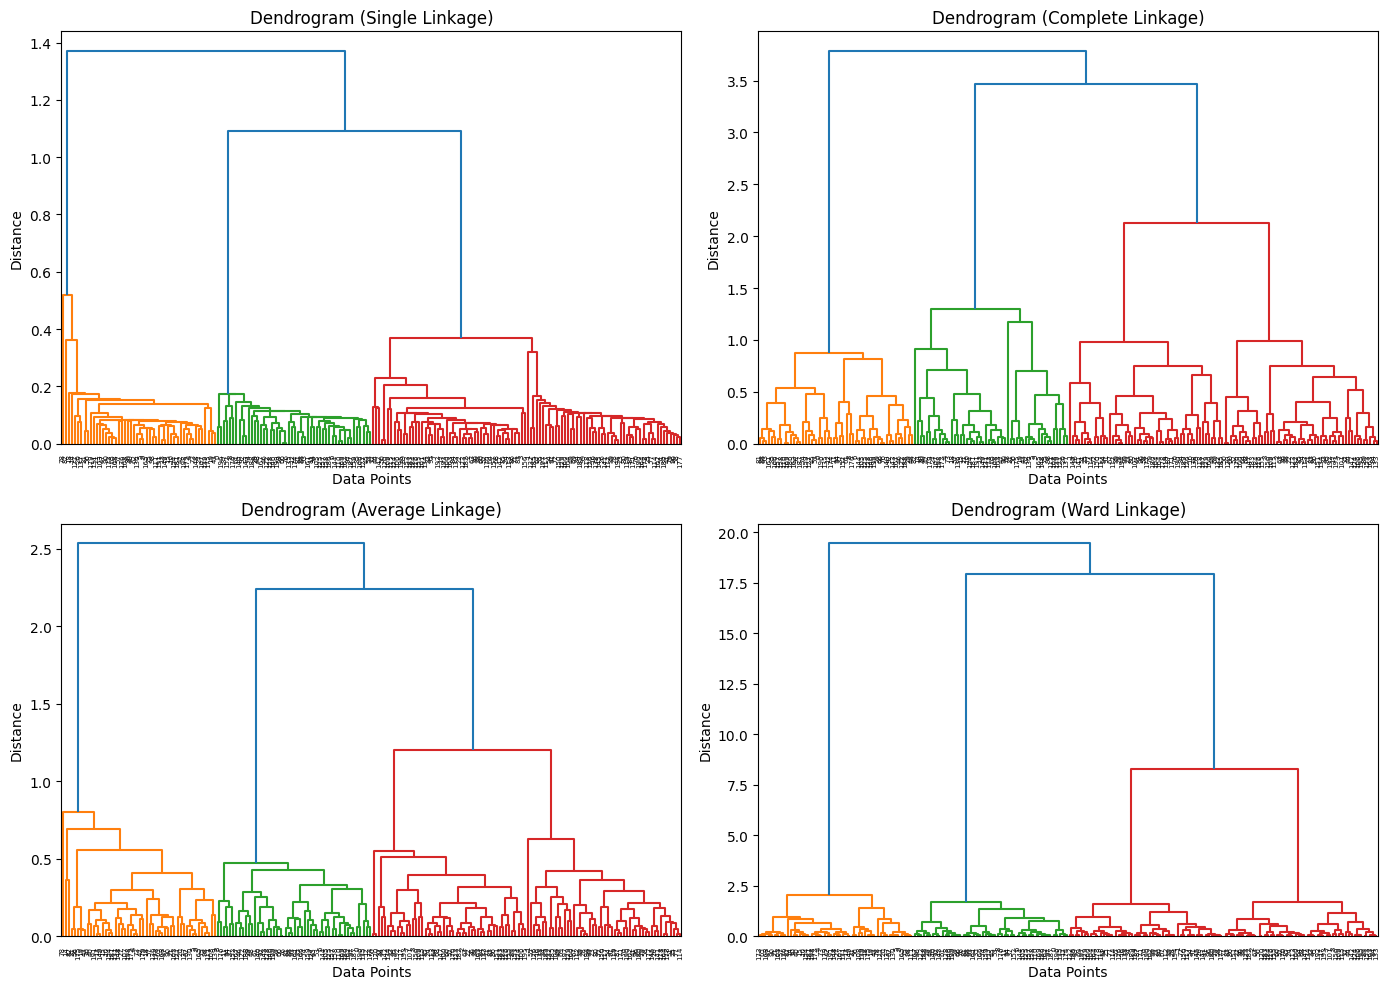

In [3]:
# Step 3️⃣: Perform Hierarchical Clustering and Visualize Dendrograms

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Define the linkage methods to test
methods = ['single', 'complete', 'average', 'ward']

plt.figure(figsize=(14, 10))

# Loop through each linkage method and plot its dendrogram
for i, method in enumerate(methods, 1):
    plt.subplot(2, 2, i)
    linked = linkage(X_scaled, method=method)
    dendrogram(linked)
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)', fontsize=12)
    plt.xlabel('Data Points')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()


In [4]:
# Step 4️⃣: Cut the Dendrogram & Apply Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering

# Choose number of clusters based on dendrogram observation (e.g., 4)
n_clusters = 4

# Create Agglomerative Clustering model
agg_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

# Fit model and predict cluster labels
labels = agg_model.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = labels

# Display few rows with cluster info
print("Data with Cluster Labels:")
print(df.head())


Data with Cluster Labels:
    Feature1   Feature2  Cluster
0   6.878808   2.541769        2
1  -5.652892  10.000569        3
2  -8.853024   6.246818        1
3 -10.576029   5.634566        1
4  -7.586865  -5.860587        0


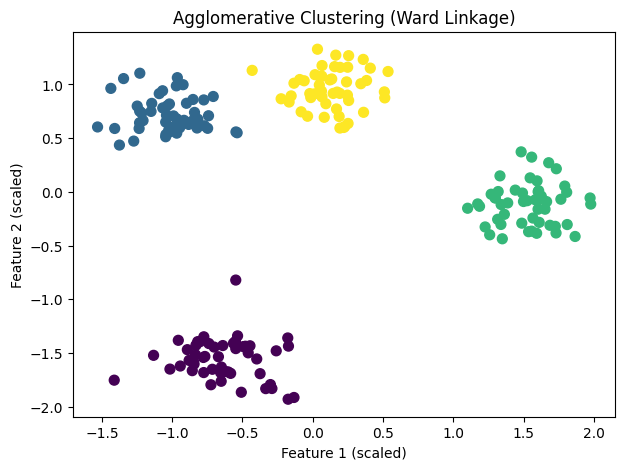

In [5]:
# Step 4️⃣ (continued): Visualize clusters

plt.figure(figsize=(7, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Agglomerative Clustering (Ward Linkage)')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()
